# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Session 14-02: One-Hot Encoding. Linear Model Diagnostics. 

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

***

In [1]:
### --- Setup - importing the libraries

# - supress those annoying 'Future Warning'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# - science
import numpy as np

# - data
import pandas as pd

# - os
import os

# - ml
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# - visualization
import matplotlib.pyplot as plt
import seaborn as sns

# - parameters
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_theme()

# - rng
rng = np.random.default_rng()

# - plots
plt.rc("figure", figsize=(8, 6))
plt.rc("font", size=14)
sns.set_theme(style='white')

# - directory tree
data_dir = os.path.join(os.getcwd(), '_data')

## 3. One-Hot (Dummy) Encoding

### Target: predict weight from all the predictors (both categorical and continuous)

In [4]:
fish_data = pd.read_csv(os.path.join(data_dir, 'Fish.csv'))
fish_data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [5]:
model_frame = fish_data.copy()

In [7]:
# - number of data entries grouped by species class
model_frame['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [8]:
predictors = model_frame.columns.drop('Weight')
predictors

Index(['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In one hot encoding categorical predictor 'split' into $C$ binary vectors, where $C$ is the number of categories. Each coordinate of this vector becomes a new "dummy" feature, corresponding to one category of a categorical variable. We won't write explicit mathematical formula of the model in this case, as it would require us going into some Linear Algebra and matrix-vector notation. 

In [9]:
# --- Composing the fomula of the model

# - right side of the formula
formula = ' + '.join(predictors)

# - left side of the formula
formula = 'Weight ~ ' + formula

formula

'Weight ~ Species + Length1 + Length2 + Length3 + Height + Width'

In [10]:
# - fitting the linear model to the data
linear_model = smf.ols(formula=formula, data=model_frame).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           6.85e-82
Time:                        19:46:36   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -918.3321    127.083     -7.226      0.000   -1169.478    -667.186
Species[T.Parkki]      164.7227     75.699      2.176      0.031      15.123     314.322
Species[T.Perch]       137.9489    120.314      1.147      0.253     -99.819     375.717
Species[T.Pike]       -208.4294    135.306     -1.540      0.126    -475.826      58.968
Species[T.Roach]       103.0400     91.308      1.128      0.261     -77.407     283.487
Species[T.Smelt]       446.0733    119.430      3.735      0.000     210.051     682.095
Species[T.Whitefish]    93.8742     96.658      0.971      0.333     -97.145     284.893
Length1                -80.3030     36.279     -2.214      0.028    -151.998      -8.608
Length2                 79.8886     45.718      1.747      0.083     -10.461     170.238
Length3                 32.5354     29.300      1.110      0.269     -25.369      90.439
Height                   5.2510     13.056      0.402      0.688     -20.551      31.053
Width                   -0.5154     23.913     -0.022      0.983     -47.773      46.742
==============================================================================
Omnibus:                       43.558   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.422
Skew:                           1.184   Prob(JB):                     7.00e-22
Kurtosis:                       6.016   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The Referrence Category 

One-hot/dummy encoding can create a high collinearity between its dummy variables - this is called "dummy variable trap". To resolve this, we chose one category as a referrence and throw its corresponding dummy variable out of the model. Therefore, we have $C-1$ dummy variables, where $C$ is the number of categories.

In [11]:
# --- Composing the fomula of the model

# - right side of the formula; continuous predictors
num_predictors = predictors.drop('Species')
formula = ' + '.join(num_predictors)

# - right side of the formula; categorical predictor, one-hot encoded using the "Perch" category as the reference
formula = 'C(Species, Treatment(reference="Perch")) + ' + formula

# - left side of the formula
formula = 'Weight ~ ' + formula
formula

'Weight ~ C(Species, Treatment(reference="Perch")) + Length1 + Length2 + Length3 + Height + Width'

In [12]:
# - fitting the linear model to the data
linear_model = smf.ols(formula=formula, data=model_frame).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           6.85e-82
Time:                        19:50:50   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                              -780.3832     39.541    -19.736      0.000    -858.526    -702.240
C(Species, Treatment(reference="Perch"))[T.Bream]      -137.9489    120.314     -1.147      0.253    -375.717      99.819
C(Species, Treatment(reference="Perch"))[T.Parkki]       26.7738     65.378      0.410      0.683    -102.429     155.977
C(Species, Treatment(reference="Perch"))[T.Pike]       -346.3783     74.804     -4.630      0.000    -494.209    -198.548
C(Species, Treatment(reference="Perch"))[T.Roach]       -34.9090     47.802     -0.730      0.466    -129.377      59.559
C(Species, Treatment(reference="Perch"))[T.Smelt]       308.1244     42.941      7.176      0.000     223.263     392.985
C(Species, Treatment(reference="Perch"))[T.Whitefish]   -44.0747     52.938     -0.833      0.406    -148.693      60.544
Length1                                                 -80.3030     36.279     -2.214      0.028    -151.998      -8.608
Length2                                                  79.8886     45.718      1.747      0.083     -10.461     170.238
Length3                                                  32.5354     29.300      1.110      0.269     -25.369      90.439
Height                                                    5.2510     13.056      0.402      0.688     -20.551      31.053
Width                                                    -0.5154     23.913     -0.022      0.983     -47.773      46.742
==============================================================================
Omnibus:                       43.558   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.422
Skew:                           1.184   Prob(JB):                     7.00e-22
Kurtosis:                       6.016   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# - predicting the values
model_frame['Predicted Weight'] = linear_model.predict()
model_frame

,Species,Weight,Length1,Length2,Length3,Height,Width,Predicted Weight
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,282.291371
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,333.884974
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,353.901528
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,440.954349
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,439.309943
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,25.130994
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,30.149127
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,54.925142
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,118.706961


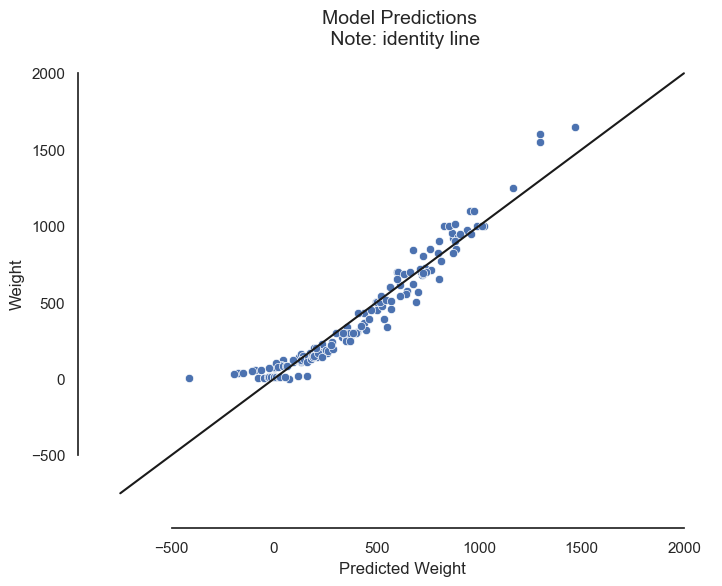

In [15]:
# - plotting the true values vs predicted values
# - the identity line (y=x) shows how good is the prediction - the closer the datapoint to the line, the better
sns.scatterplot(data=model_frame, x='Predicted Weight', y='Weight')
sns.lineplot(x=np.arange(-750, 2000), y=np.arange(-750, 2000), color='k')
sns.despine(offset=10, trim=True)
plt.title('Model Predictions \n Note: identity line', fontsize=14);